## VGG-16

In [3]:
from keras.applications import vgg16
model = vgg16.VGG16()

############# 224,224 총 16개 레이어에, 1000개의 카테고리를 분류하는 모델을 불러옴

165216256/553467096 [=======>......................] - ETA: 26s

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
model1 = vgg16.VGG16(include_top=False, classes=3, input_shape=(32,32,3))
model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [9]:
base='d:/vgg/*.jpg'

from glob import glob
from PIL import Image
import numpy as np

file=glob(base)[0]
img=Image.open(file).resize((224,224)).convert('RGB')
img=np.array(img)
img=np.reshape(img, (1,224,224,3))

pred=model.predict(img)

In [15]:
len(pred[0])
# vgg 사용 시 카테고리가 1000개가 나옴

1000

###### 1000개의 카테고리를 모르는데 어떻게 찾는가?
- decode 사용

In [16]:
# 모델 적용된 결과를 파싱
label = vgg16.decode_predictions(pred)
# label = [[('n02655020', 'puffer', 0.9612253), ... ]]
# 코드넘버, 명칭, 확률값으로 나옴
# label[1]이 원하는 라벨값

49152/35363 [=========================================] - 0s 0us/step


In [17]:
# 가장 확률이 높은 결과를 획득
label = label[0][0]

In [18]:
# 라벨과 라벨을 예측한 확률을 출력
print('%s (%.2f%%)' % (label[1], label[2]*100))

Granny_Smith (38.52%)


In [29]:
from glob import glob
from PIL import Image
import numpy as np
import os

base='d:/vgg/*.jpg'
fileList=glob(base)

for file in fileList:
    img=Image.open(file).resize((224,224)).convert('RGB')
    img=np.array(img)
    img=np.reshape(img, (1,224,224,3))

    yhat=model.predict(img)  # 1000개의 softmax로 출력

    label=vgg16.decode_predictions(yhat)
    label = label[0][0]
    pred=label[1]

    print(pred)
    #################### 예측된 값에 의해 이미지를 예측 폴더로 이동
    # ex) dog으로 예측되면 dog 폴더를 만들고 (이미 있으면 pass)
    # dog 폴더로 이미지 이동
    # 각 폴더의 자료 갯수를 확인하여 dataframe 제작 (폴더명, 파일 갯수) dog 5, cat 13 
    # 차트 그리기 


African_elephant
Granny_Smith
tusker
pencil_sharpener
sports_car
sports_car
Walker_hound
English_setter
hare
Granny_Smith


In [ ]:
##############################  folder 생성 시간까지 출력

# from glob import glob
# from PIL import Image
# import numpy as np
# import os
# from datetime import datetime
# import shutil

# tmp=datetime.now()


# base='d:/vgg/*.jpg'
# fileList=glob(base)
# baseFolder='d:/vgg/'



# for file in fileList:
#     img=Image.open(file).resize((224,224)).convert('RGB')
#     img=np.array(img)
#     img=np.reshape(img, (1,224,224,3))

#     yhat=model.predict(img)  # 1000개의 softmax로 출력

#     label=vgg16.decode_predictions(yhat)
#     label = label[0][0]
#     pred=label[1]
#     # print(pred)

#     newFolder=baseFolder+pred
#     try:
#         os.mkdir(newFolder)
#     except:
#         pass

#     shutil.move(file, newFolder)
#     # print(newFolder+'/'+file)
#     os.rename(newFolder+'/'+str(tmp)+'_'+file)

In [30]:
from glob import glob
from PIL import Image
import numpy as np
import os
import shutil

base='d:/vgg/*.jpg'
fileList=glob(base)

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('error:creating_directory'+ directory)


for file in fileList:
    img=Image.open(file).resize((224,224)).convert('RGB')
    img=np.array(img)
    img=np.reshape(img, (1,224,224,3))

    yhat=model.predict(img)  # 1000개의 softmax로 출력

    label=vgg16.decode_predictions(yhat)
    label = label[0][0]
    pred=label[1]

    print(pred)
    #################### 예측된 값에 의해 이미지를 예측 폴더로 이동
    # ex) dog으로 예측되면 dog 폴더를 만들고 (이미 있으면 pass)
    # dog 폴더로 이미지 이동
    # 각 폴더의 자료 갯수를 확인하여 dataframe 제작 (폴더명, 파일 갯수) dog 5, cat 13 
    # 차트 그리기 
    

    createFolder('d:/vgg/'+pred)
    shutil.move(file, 'd:/vgg/'+pred)


African_elephant
Granny_Smith
tusker
pencil_sharpener
sports_car
sports_car
Walker_hound
English_setter
hare
Granny_Smith


In [57]:
base_dir = 'd:/vgg/*'
folderList=glob(base_dir)
folderList

folderName=[]
fileNum=[]
for folder in folderList:
    # print(folder)
    folderName.append(folder.split('\\')[1])
    # print(len(glob(folder+'/*')))
    fileNum.append(len(glob(folder+'/*')))

<BarContainer object of 8 artists>

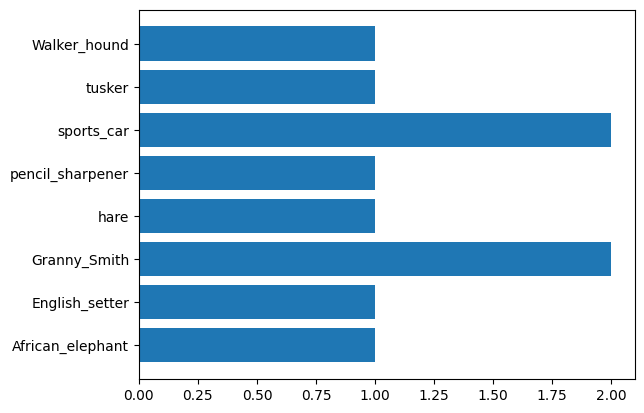

In [67]:
import pandas as pd

df = pd.DataFrame(folderName, columns=['folderName'])
df['fileNum']=fileNum
df

df['fileNum']

import matplotlib.pyplot as plt
plt.barh(df['folderName'], df['fileNum'])

In [ ]:
# import matplotlib.pyplot as plt
# folderName,fileCnt=[],[]
# folderList=glob(baseFolder+'*')
# for folder in folderList:
#     cnt=len(glob(folder + '/*.jpg'))
#     folderName.append(folder.split('\\')[1])
#     fileCnt.append(cnt)


# df=pd.DataFrame({'folderName':folderName, 'fileCnt':fileCnt})
# df['ratio']=round((df['fileCnt']/df['fileCnt'].sum())*100,2)
# display(df.T)

# plt.barh(df['folderName'],df['fileCnt'])